In [69]:
##import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [70]:
## Create dataset using quadratic equation

np.random.seed(42)

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2 + outliers

print(X.shape)
y.shape

(100, 1)


(100, 1)

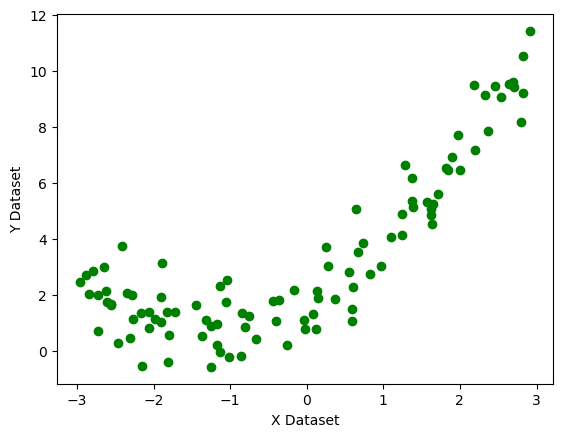

In [71]:
plt.scatter(X, y, c = 'g')

plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')
plt.show()

In [72]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [73]:
# Let's Implement simple linear regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs = -1)

regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [74]:
## Prediction data
y_pred = regression.predict(X_test)

In [75]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.6517667218574366

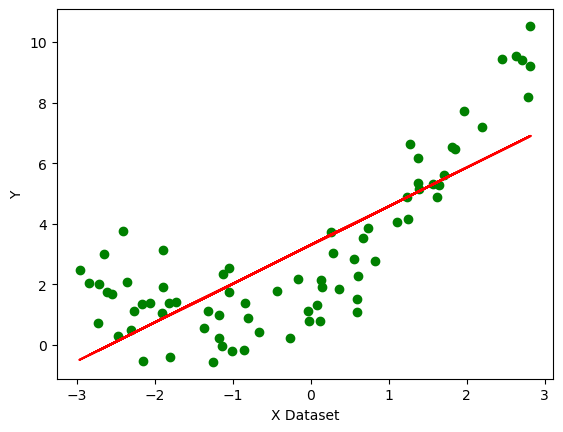

In [76]:
plt.scatter(X_train, y_train, c = 'g')
plt.plot(X_train, regression.predict(X_train),c = 'r')
plt.xlabel("X Dataset")
plt.ylabel("Y")
plt.show()

In [77]:
## Let's apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [78]:
X_train_poly

## c + m1x + m2x^2

array([[ 1.00000000e+00, -1.89957294e+00,  3.60837736e+00],
       [ 1.00000000e+00, -2.26777059e+00,  5.14278345e+00],
       [ 1.00000000e+00,  1.36396976e-01,  1.86041351e-02],
       [ 1.00000000e+00,  1.24843547e+00,  1.55859111e+00],
       [ 1.00000000e+00, -2.96686730e+00,  8.80230156e+00],
       [ 1.00000000e+00,  2.81945911e+00,  7.94934969e+00],
       [ 1.00000000e+00,  1.20408127e-01,  1.44981171e-02],
       [ 1.00000000e+00, -1.04890007e+00,  1.10019135e+00],
       [ 1.00000000e+00,  5.54487413e-01,  3.07456291e-01],
       [ 1.00000000e+00,  3.67663185e-01,  1.35176218e-01],
       [ 1.00000000e+00, -2.06403288e+00,  4.26023172e+00],
       [ 1.00000000e+00, -2.15445465e+00,  4.64167484e+00],
       [ 1.00000000e+00,  2.56176499e-01,  6.56263986e-02],
       [ 1.00000000e+00,  1.85038409e+00,  3.42392128e+00],
       [ 1.00000000e+00, -1.17454654e+00,  1.37955958e+00],
       [ 1.00000000e+00, -1.89087327e+00,  3.57540171e+00],
       [ 1.00000000e+00,  2.79379220e+00

In [79]:
X_test_poly

array([[ 1.        , -2.6186499 ,  6.85732729],
       [ 1.        ,  2.3689641 ,  5.61199092],
       [ 1.        ,  1.63346862,  2.66821972],
       [ 1.        ,  0.97513371,  0.95088574],
       [ 1.        , -1.44732011,  2.0947355 ],
       [ 1.        , -0.35908504,  0.12894206],
       [ 1.        , -1.24713211,  1.5553385 ],
       [ 1.        ,  2.17862056,  4.74638752],
       [ 1.        , -2.87649303,  8.27421218],
       [ 1.        , -0.75275929,  0.56664654],
       [ 1.        , -0.40832989,  0.1667333 ],
       [ 1.        ,  0.64526911,  0.41637223],
       [ 1.        ,  1.89276857,  3.58257286],
       [ 1.        ,  2.69331322,  7.25393612],
       [ 1.        , -2.28243452,  5.20950736],
       [ 1.        , -2.06388816,  4.25963433],
       [ 1.        ,  1.62762208,  2.64915364],
       [ 1.        , -2.55573209,  6.53176651],
       [ 1.        ,  1.99465584,  3.97865194],
       [ 1.        , -1.97685526,  3.90795671],
       [ 1.        ,  2.53124541,  6.407

In [80]:
## retrain model after applying polynomial regression

from sklearn.metrics import r2_score

regression = LinearRegression()
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)

score = r2_score(y_test, y_pred)
print(score)

0.9438298073788599


In [81]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.42074271 0.54611045]]
[1.76496582]


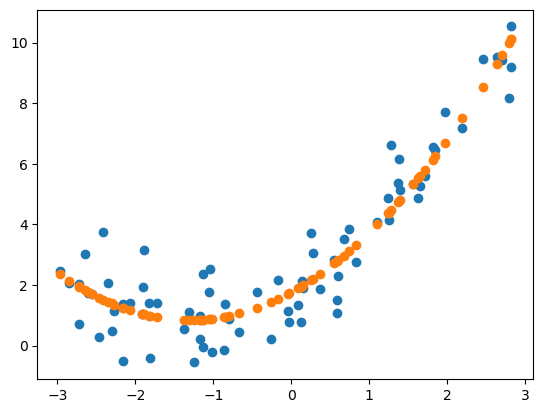

In [82]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly))
plt.show()

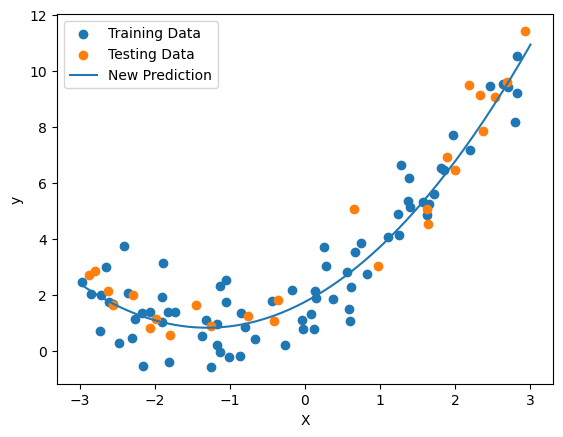

In [83]:
## Predict new data set

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)


y_new = regression.predict(X_new_poly)

plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test, label = 'Testing Data')
plt.plot(X_new, y_new, label = 'New Prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [84]:
## check for 3 degree

poly = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regression = LinearRegression()
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)

score = r2_score(y_test, y_pred)

print(score)

0.9424693040197244


when we increase degreen 2 to 3 minute change apear in accuracy.


## __`Pipeline Concepts`__ 

In [85]:
from sklearn.pipeline import Pipeline

In [86]:
def poly_regression(degree):
    
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_feature = PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg = LinearRegression(n_jobs = -1)

    poly_regression = Pipeline([
        ('poly_features', poly_feature),
        ('lin_reg', lin_reg)
    ])

    poly_regression.fit(X_train, y_train) # fit for polynomial tranformation and apply linear Regression

    y_pred_new = poly_regression.predict(X_new)
    score = r2_score(y_test, poly_regression.predict(X_test))


    print(f'The Accuracy of model with degree {degree} is : {score * 100:.2f}%')
    ## Ploting Prediction line
    plt.scatter(X_train, y_train, label = 'Train_data')
    plt.scatter(X_test, y_test, label = 'Test Data')
    plt.plot(X_new, y_pred_new, 'r' , label = "Degree " + str(degree))
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

The Accuracy of model with degree 2 is : 94.38%


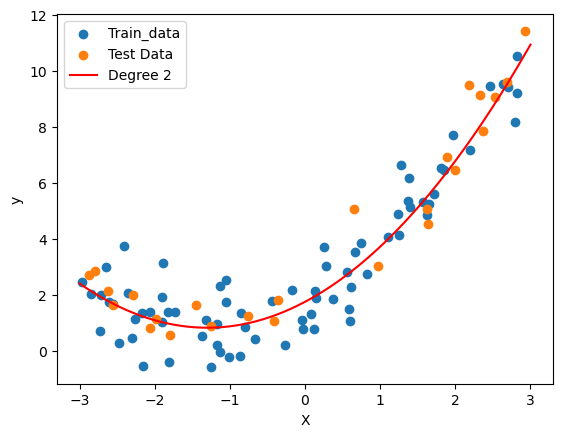

In [87]:
## Call the function
poly_regression(2)